In [15]:
import scanpy as sc
import harmonypy as hm
from scSLAT.model import scanpy_workflow

In [2]:
adata1 = sc.read_h5ad('../results_bak/visium_huamn_DLPFC/cells:0/adata1.h5ad')
adata2 = sc.read_h5ad('../results_bak/visium_huamn_DLPFC/cells:0/adata2.h5ad')

In [36]:
adata1 = sc.read_h5ad('../../../data/visium/DLPFC/region_1/151674_labeled.h5ad')
adata2 = sc.read_h5ad('../../../data/visium/DLPFC/region_1/151675_labeled.h5ad')

In [40]:
adata1.obs.cell_type.value_counts()

0    1206
1    1152
3     648
2     629
Name: cell_type, dtype: int64

In [39]:
adata2.obs.cell_type.value_counts()

0    1186
1    1031
2     725
3     624
Name: cell_type, dtype: int64

In [16]:
adata_all = adata1.concatenate(adata2)
adata_all

/lustre/grp/bitcap/xiacr/spatialGLUE-dev/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 7201 × 10629
    obs: 'in_tissue', 'array_row', 'array_col', 'imagerow', 'imagecol', 'sum_umi', 'sum_gene', 'subject', 'position', 'replicate', 'discard', 'cell_count', 'layer_guess', 'layer_guess_reordered', 'layer_guess_reordered_short', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'leiden', 'cell_type', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_counts-1'
    obsm: 'X_harmony', 'X_pca', 'spatial'
    layers: 'counts'

In [17]:
# adata_all = adata1.concatenate(adata2)
# adata_all = scanpy_workflow(adata_all)
# harm = hm.run_harmony(adata_all.obsm['X_pca'], adata_all.obs, 'batch', max_iter_harmony=20)
# Z = harm.Z_corr.T
# adata_all.obsm['X_harmony'] = Z

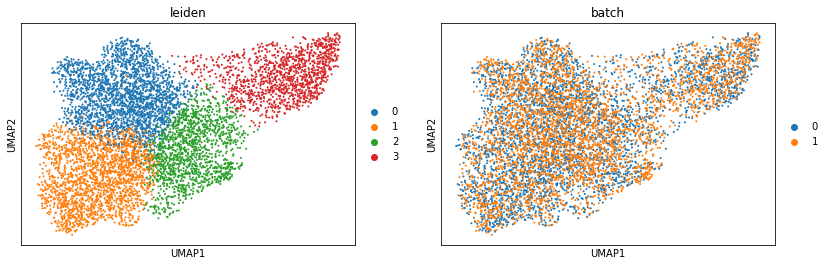

In [18]:
sc.pp.neighbors(adata_all,use_rep='X_harmony')
sc.tl.leiden(adata_all,resolution=0.55)
sc.tl.umap(adata_all)
sc.pl.umap(adata_all, color=["leiden","batch"])

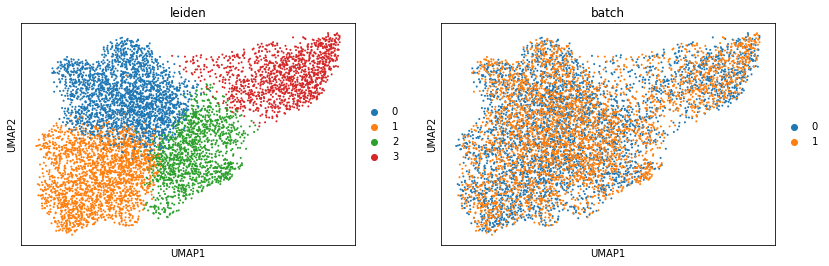

In [30]:
sc.tl.leiden(adata_all,resolution=0.5)
sc.pl.umap(adata_all, color=["leiden","batch"])

In [33]:
adata1.obs['leiden'] = adata_all.obs['leiden'][:adata1.shape[0]].values
adata2.obs['leiden'] = adata_all.obs['leiden'][adata1.shape[0]:].values

In [38]:
adata1.obs['cell_type'] = adata1.obs['leiden'] 
adata2.obs['cell_type'] = adata2.obs['leiden']

In [14]:
adata1.write_h5ad('../../../data/visium/DLPFC/region_1/151674_labeled.h5ad')
adata2.write_h5ad('../../../data/visium/DLPFC/region_1/151675_labeled.h5ad')

In [27]:
other1 = sc.read_h5ad('../results_bak/visium_huamn_DLPFC/cells:0/adata1.h5ad')
other2 = sc.read_h5ad('../results_bak/visium_huamn_DLPFC/cells:0/adata2.h5ad')

In [31]:
other1.obs.leiden.value_counts()

0    1206
1    1152
3     648
2     629
Name: leiden, dtype: int64

In [29]:
other2.obs.leiden.value_counts()

0    1186
1    1031
2     725
3     624
Name: leiden, dtype: int64